# **Statistics for Angle to ablation Analysis**
(Stats_Angles2Ablation) by Stephane Verger

This notebook proposes various statistical analysis of the data (descriptive and inferential), obtained from the quantification output of the Angle2Ablation.ijm macro.

* **1- Single condition/timepoint:** Display data, mean angle and anisotropy, histogram representation, and data distrubution skewness and mode.
* **2- Multiple condition and time points comparisons:** Same as single but does it for multiple subfolders (corresponding to different condition/timepoints) in a folder. Then displays boxplots of the of angles and anisotropies comparing different samnples and generate statistical test.
* **3- Timelapses...Todo**

First load packages and functions (click on the cell and hit enter+shift to run it).
Then run each cell one by one depending on the analysis you want to perform.

### **Load required packages**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Show packages version number

In [2]:
%load_ext watermark
%watermark -v -m -p pandas,numpy,matplotlib,seaborn,scipy,watermark

CPython 3.7.7
IPython 7.16.1

pandas 1.0.5
numpy 1.18.5
matplotlib 3.2.2
seaborn 0.10.1
scipy 1.5.0
watermark 2.0.2

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-1087-oem
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


## **1. Single condition/timepoint**
To examine each data groups descriptive statistics independently. Can be useful before comparative analysis, but not mandatory. Similar data is automatically generated for each compared conditions in "2- Multiple condition and time points comparisons". This part of the notebook can also be useful if you want to modify part of the analysis pipeline to test different functions and paramaters by modifying the code (e.g. for the histogram layout).

Run at least once the function in "1.4. Make histograms of angles" to load it before running the multiple comparison.

### **1.1. Load data**
Below, in single_file_path, define the full path to the file containing all the data to analyse and compare (All_..._Angle2Ablation.txt). Use tab to help navigation in the folders.

In [3]:
single_file_path = '/home/stephane/Desktop/Segmentation4FTBatch-master/Test_file/All_Test_file_Angle2Ablation.txt'

Extracts the folder name and path for figure labelling

In [4]:
single_folder_path = os.path.dirname(single_file_path)
single_folder_name = os.path.basename(single_folder_path) 
print (single_folder_path)
print (single_folder_name)

/home/stephane/Desktop/Segmentation4FTBatch-master/Test_file
Test_file


### **1.2. Display the data in a table**
Show content of the file loaded above

In [5]:
single_data = pd.read_csv(single_file_path, sep = "\t")
single_data

,CellNumber,FibrilTool Angle,Drawn Line Angle,Raw angle,Absolute angle,Acute absolute angle to ablation,Anisotropy,Sample Number
0,1,25.2011,10.9807,14.2205,14.2205,14.2205,0.1865,1
1,2,28.4429,163.6105,-135.1675,135.1675,44.8325,0.2145,1
2,3,31.4296,77.2756,-45.8461,45.8461,45.8461,0.2279,1
3,4,22.6199,78.3106,-55.6908,55.6908,55.6908,0.1345,1
4,5,37.2348,159.6236,-122.3887,122.3887,57.6113,0.2523,1
5,6,36.3844,12.9946,23.3897,23.3897,23.3897,0.1961,1
6,1,28.4429,179.2927,-150.8498,150.8498,29.1502,0.2145,2
7,2,12.0948,93.5763,-81.4816,81.4816,81.4816,0.1161,2
8,3,28.6105,82.1467,-53.5362,53.5362,53.5362,0.2459,2
9,4,36.3844,161.8781,-125.4938,125.4938,54.5062,0.1961,2


### **1.3. Descriptive statistics**
Calculate the number of samples (count), mean value, standard deviation, lowest and highest values (min/max), and percentiles (50% = median) of the angle and anisotropy values.

In [6]:
Angle_desc_stats = single_data['Acute absolute angle to ablation'].describe()
Angle_desc_stats

count    11.000000
mean     42.230273
std      22.379770
min       4.267900
25%      26.269950
50%      45.846100
75%      55.098500
max      81.481600
Name: Acute absolute angle to ablation, dtype: float64

In [7]:
Anisotropy_desc_stats = single_data['Anisotropy'].describe()
Anisotropy_desc_stats

count    11.000000
mean      0.197073
std       0.042148
min       0.116100
25%       0.184950
50%       0.196100
75%       0.221200
max       0.252300
Name: Anisotropy, dtype: float64

### **1.4. Make histograms of angles**
Generates one histogram diplaying simply the distribution of the angles, and one histogram with added anisotropy weight. (Data for which the anisotropy is higher are given more weight in the histogram).

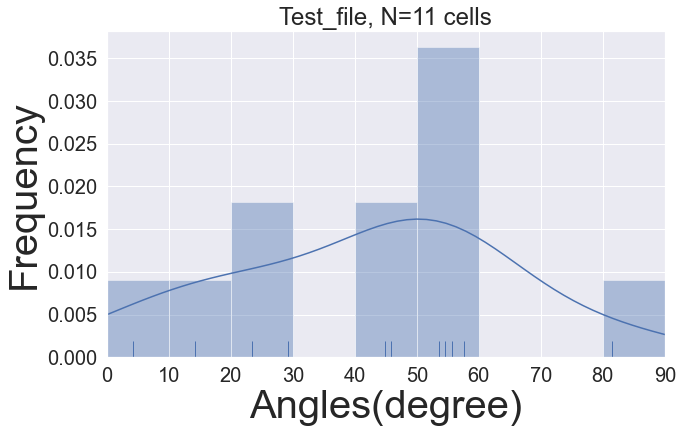

In [10]:
def makeAnglesHistogram(HistAngles):
    sns.set(rc={'figure.figsize':(10,6)}) # To change the size of the figure
    bins = np.linspace(0, 90, 10) # To change the number of histogram bin (bars).
    sns.distplot(HistAngles, bins=bins, rug=True)
    plt.xlabel('Angles(degree)', fontsize=40) # To change the axis labels and font size
    plt.ylabel('Frequency', fontsize=40) # To change the axis labels and font size
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(0,90)
    plt.title(single_folder_name + ', N=' + str(len(HistAngles)) + ' cells', fontsize=24) # To change the figure title
    plt.grid(True)

SingleAngleHist = makeAnglesHistogram(single_data['Acute absolute angle to ablation'])

### **1.5. Make box plots of angles and anisotropies**
Generates boxplot overlayed with stripplot diplaying the distribution of the angles as well as anisotropes, for each sample in the condition. Can allow to check if most samples behave in the same way.

The function defined here to make the box plot is the same one used in the multiple comparison later so the boxplot layout and  style can be changed here.

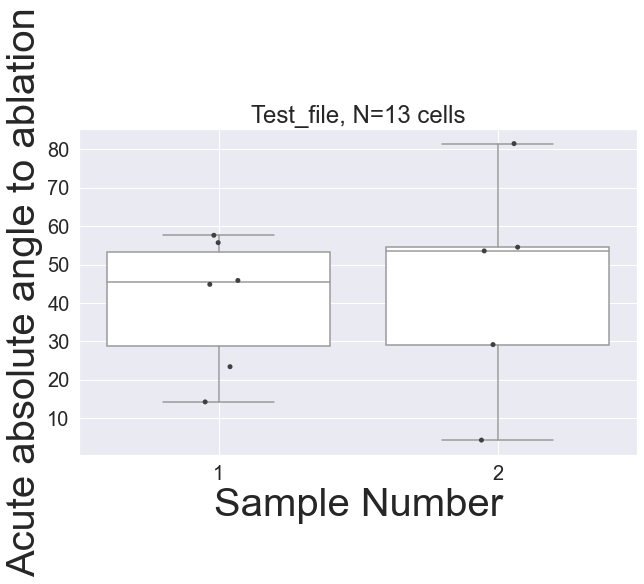

In [11]:
def makeStripBoxplot(StripBoxDataFile, sample, value):
    ax = sns.boxplot(x=sample, y=value, data=StripBoxDataFile, color='w')
    ax = sns.stripplot(x=sample, y=value, data=StripBoxDataFile, color='0.25')
    plt.xlabel(sample, fontsize=40) # To change the axis labels and font size
    plt.ylabel(value, fontsize=40) # To change the axis labels and font size
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(single_folder_name + ', N=' + str(len(sample)) + ' cells', fontsize=24) # To change the figure title
    plt.grid(True)
    
SingleAngleBoxplot = makeStripBoxplot(single_data, 'Sample Number', 'Acute absolute angle to ablation')

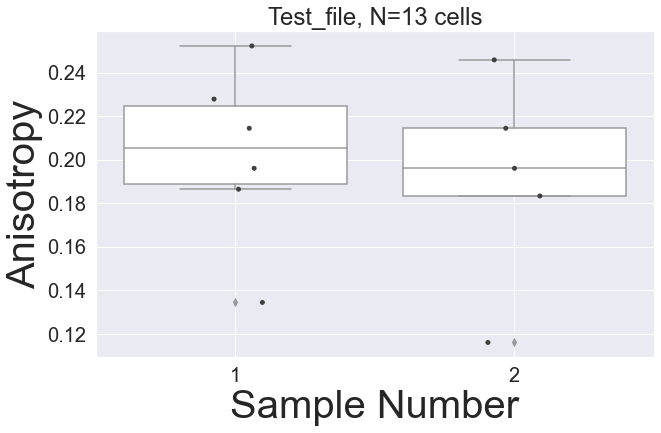

In [12]:
SingleAnisotropyBoxplot = makeStripBoxplot(single_data, 'Sample Number', 'Anisotropy')

### **1.6. Skweness**
"Skew: For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking. If the p-value is lower than 0.05, it can be considered that the distribution is significantly skewed." From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [13]:
skew=stats.skew(single_data['Acute absolute angle to ablation'])
statskew, pskew=stats.skewtest(single_data['Acute absolute angle to ablation'])
print ("skew " + str(skew) + "\npvalue " + str(pskew))

skew -0.1468922623948227
pvalue 0.7870761723999251


### **1.7. Save output**
Not necessary if you intend to perform multiple comparison with the condition examined here.

Define where to save the output.

In [ ]:
single_output_path = '/home/stephane/Desktop/Segmentation4FTBatch-master/response/'

In [ ]:
...To do figure.savefig(single_folder + "_histogram.svg")

## **2. Multiple condition and time points comparisons:** 
Same as single but does it for multiple subfolders (corresponding to different condition/mutant/timepoints) in a folder. In addition displays boxplots of the of angles and anisotropies comparing different samnples and generate statistical tests to determine i fthere is a difference between the compared samples.


### **2.1. Load data**
Below, in multiple_updir_path, define the full path to the folder containing the subfolders of the conditions and timepoint to compare. Use tab to help navigation in the folders.

In [14]:
multiple_updir_path = '/home/stephane/Desktop/Segmentation4FTBatch-master/'

### **2.2. Generate and save descriptive statistics**
Number of samples, mean value, standard deviation,... Histogram, boxplots and test skewness for each condition. As in "1."

.ipynb_checkpoints folder skipped



>Condition analyzed: Test_file
Data: 
- Angle_data_Test_file:
[14.2205 44.8325 45.8461 55.6908 57.6113 23.3897 29.1502 81.4816 53.5362
 54.5062  4.2679]
	Mean angle +- std: 42.23 +- 21.34

- Anisotropy_data_Test_file:
[0.1865 0.2145 0.2279 0.1345 0.2523 0.1961 0.2145 0.1161 0.2459 0.1961
 0.1834]
	Mean anisotropy +- std: 0.2 +- 0.04

skew -0.1468922623948227
pvalue 0.7870761723999251


>Condition analyzed: response
Data: 
- Angle_data_response:
[ 0.4019  8.4598  5.4403  1.9473  7.3423 10.3717  7.9119  4.4586 27.6015
 15.2551  9.5125 11.3839]
	Mean angle +- std: 9.17 +- 6.79

- Anisotropy_data_response:
[0.1282 0.2145 0.1523 0.1345 0.1572 0.1834 0.1419 0.1493 0.0945 0.1572
 0.1533 0.0702]
	Mean anisotropy +- std: 0.14 +- 0.04

skew 1.4027304520282682
pvalue 0.015363562783311462



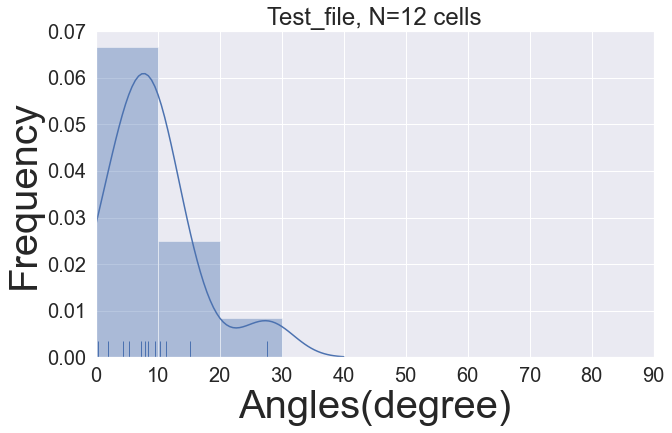

In [17]:
###Defines arrays and dictionaries for the concatenation of the data
subfolder_names = []
angle_data = []
anisotropy_data = []
angle_data_ = {}
anisotropy_data_ = {}

fig=1
###Find subdirectories containing the experiments/conditions to analyse
for dirname in sorted(os.listdir(multiple_updir_path)):
    dirpath = multiple_updir_path + dirname
    if os.path.isdir(dirpath):
        if ".ipynb_checkpoints" in dirname:
            print (".ipynb_checkpoints folder skipped\n\n")
        else:
            print ("\n>Condition analyzed: " + dirname)

            ### In dictionaries, generate a new empty array for current subfolder
            angle_data_[dirname] = []
            anisotropy_data_[dirname] = []

            ### Add the current subfolder name to the list of analyzed subfolder names
            subfolder_names.append(dirname)

            ### Get angles and anisotropies of all FT to ablation for one condition
            print ("Data: ")
            Result_file_name = 'All_' + dirname + '_Angle2Ablation.txt'
            x = np.genfromtxt(dirpath + '/' + Result_file_name, skip_header=1, delimiter='\t', usecols=5)
            y = np.genfromtxt(dirpath + '/' + Result_file_name, skip_header=1, delimiter='\t', usecols=6)
            print ("- Angle_data_" + str (dirname) + ":\n" + str(x))
            print ("\tMean angle +- std: " + str(round(np.mean(x), 2)) + " +- " + str(round(np.std(x),2)) + "\n")
            print ("- Anisotropy_data_" + str (dirname) + ":\n" + str(y))
            print ("\tMean anisotropy +- std: " + str(round(np.mean(y), 2)) + " +- " + str(round(np.std(y),2 )) + "\n")
            
            ### Create for each folder one new array containing the angles values and one for the anisotropies
            angle_data_[dirname].append(x)
            anisotropy_data_[dirname].append(y)
            
            ### Create one new array containing the angles values and one for the anisotropies for all conditions analyzed
            angle_data.append(x)
            anisotropy_data.append(y)
            
            ### For each condition, calculate mode and skew corresponding to the histogram
            skew=stats.skew(x)
            statskew, pskew=stats.skewtest(x)
            print ("skew " + str(skew) + "\npvalue " + str(pskew) + "\n")
            
            ### For each condition, histogram of distribution with anisotropy
            figure = plt.figure(str(fig))
            figure.clf()
            makeAnglesHistogram(x)
            figure.savefig(multiple_updir_path + dirname + "_histogramfh.svg")
                 
